In [24]:
# import qutip packages
from qutip import *
import krotov
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.random as rnd
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import scipy

$\newcommand{tr}[0]{\operatorname{tr}}
\newcommand{diag}[0]{\operatorname{diag}}
\newcommand{abs}[0]{\operatorname{abs}}
\newcommand{pop}[0]{\operatorname{pop}}
\newcommand{aux}[0]{\text{aux}}
\newcommand{opt}[0]{\text{opt}}
\newcommand{tgt}[0]{\text{tgt}}
\newcommand{init}[0]{\text{init}}
\newcommand{lab}[0]{\text{lab}}
\newcommand{rwa}[0]{\text{rwa}}
\newcommand{bra}[1]{\langle#1\vert}
\newcommand{ket}[1]{\vert#1\rangle}
\newcommand{Bra}[1]{\left\langle#1\right\vert}
\newcommand{Ket}[1]{\left\vert#1\right\rangle}
\newcommand{Braket}[2]{\left\langle #1\vphantom{#2} \mid #2\vphantom{#1}\right\rangle}
\newcommand{op}[1]{\hat{#1}}
\newcommand{Op}[1]{\hat{#1}}
\newcommand{dd}[0]{\,\text{d}}
\newcommand{Liouville}[0]{\mathcal{L}}
\newcommand{DynMap}[0]{\mathcal{E}}
\newcommand{identity}[0]{\mathbf{1}}
\newcommand{Norm}[1]{\lVert#1\rVert}
\newcommand{Abs}[1]{\left\vert#1\right\vert}
\newcommand{avg}[1]{\langle#1\rangle}
\newcommand{Avg}[1]{\left\langle#1\right\rangle}
\newcommand{AbsSq}[1]{\left\vert#1\right\vert^2}
\newcommand{Re}[0]{\operatorname{Re}}
\newcommand{Im}[0]{\operatorname{Im}}$

# The Model (FMO with N Sites/Qubits)

# Define the Hamiltonian and Liouvillian

We model our network model based on previous theoretical descriptions of PPCs as a network composed of distinct sites, one of which receives a single excitation (which we choose to be $\ket{1}$ for the time being) and one site to be connected to the Reaction Center/Sink (which we choose to be $\ket{N}$.  The network of $N$ sites is described by the Hamiltonian with hopping parameters fixed by geometry and dipolar structure of site interactions:

$H = \Sigma_{j = 1}^N \hbar \omega_j \sigma_j^+ \sigma_j^- + \Sigma_{j \ne l} \hbar \nu_{j,l} (\sigma_j^- \sigma_l^+ + \sigma_j^+ \sigma_l^-)$

where we define the raising and lowering operators to be $\sigma_j^+ = \ket{j}\bra{0}$ and $\sigma_j^- = \ket{0}\bra{j}$ for site $j$, and state $j$ denoting one excitation in the site $j$ and $\ket{0}$ is the zero excitation states.  $\hbar \omega_j$ are the local site energies and $\nu_{j, l}$ are the coherent tunneling amplitudes between sites $j$ and $l$ (we do not consider microscoping coupling).  Our Hilbert space is actually defined as $N + 2$ states because we define an additional sink state at $\ket{N+1}$.

# Cavity Addition

The system is confined inside an optical cavity in the strong coupling regime with resonance frequency $omega_c$ where the Jaynes-Cummings model can be adopted. Energy is injected into the system with an external laser pump with frequency $omega_l$.  We will consider the pump field to be a continuous wave.  We will consider the case where the pump field is turned on at a certain time, which allows us to explore both the stationary response in the CW field as well as transient excitation dynamics.  We consider collinear polarization of the alser field and cavity mode because the extension of the model to pulsed excitation and cross field polarization is similar.  

THe LHC excitation dynamics is characterized by monitoring the mean photon number and second order coherence function of the light leaking out of the cavity.  
The cavity Hamiltonian is given by (where $a^+, a$ denote the cavity photon creation, annhilation operators.

$H = \omega_c a^+ a$

The coherent interaction between the cavity mode and the system is given by (where $g$ is the coupling constant and $\mu_i$ is the projection of the transition dipole moment of a site along the polarization of the cavity mode)

$H_c = \Sigma_{i = 1}^N g \mu_i (\omega_i^+ a + \sigma_i^- a^+)$

Additionally, we couple the Hamiltonian with an external laser field:
$H_l(t) = -\Sigma_{i = 1}^N \mu_i E(\omega, t)\sigma_i^+ + h.c.$

We assume that the system is susceptible simultaneously to two distinct types of noise: a radiative decay process that transfers the excitation energy in site j to the environment with a rate $\Gamma_j$ and a pure dephasing process with rate $\gamma_j$ that destroyes phase coherence for localized excitations.  We model the system's density matrix by a Markovian Lindbladian Master Equation:

$\dot{\rho} = -i[H, \rho] + \mathcal{L}_{rad}(\rho)+ \mathcal{L}_{deph}(\rho)$

where we define the local radiative and dephasing terms by the Lindblad superoperators $\mathcal{L}_{rad}$ and $\mathcal{L}_{deph}$:

$\mathcal{L}_{deph} = \Sigma_{j = 1}^N\gamma_j[-\{\sigma_j^+ \sigma_j^-, \rho\} + 2\sigma_j^+ \sigma_j^- \rho \sigma_j^+ \sigma_j^-]$

$\mathcal{L}_{diss}(\rho) = \Sigma_{j = 1}^N\Gamma_j[-\{\sigma_j^+ \sigma_j^-, \rho\} + 2\sigma_j^- \rho \sigma_j^+])$

where $\{A, B\}$ describes an anticommutator relation.

We include an additional relaxation through the interaction with the cavity that has a damping channel described by the Lindbladian:

$\mathcal{L}_{C}(\rho) = \Gamma_C/2[-\{a^+ a, \rho\} + 2a \rho a^+])$

We measure the total excitation transfer by the population transferred to the Reaction Center, which we model as the sink node as $N + 1$ that is populated by an irreversible decay process with rate $\Gamma_{N+ 1}$ from a site $k$ (which we choose to be $\ket{N}$ and described by a Lindblad operator:

 $\mathcal{L}_{sink}(\rho) = \Gamma_c[2 \sigma_c^+ \sigma_k^- \rho \sigma_k^+ \sigma_c^- - \{\sigma_k^+ \sigma_c^- \sigma_c^+, \rho \}]))$

Our objective is to measure the excitation transfer by measuring the population to the sink.  The sink population is modeled by $p_{sink}(t) = 2\Gamma_c \int_0^t\rho_{kk}(t') dt'$.

# Problem Parameters

Here we use units where ℏ=1:

In [54]:
# define units for the problem
hbar = 1;

In [91]:
# define FMO system for initial state excited at state 1
N = 3;
M = 20;
#input:

# N = number of sites, site N + 1 being the sink, and a site 0 being the zero exciton state, 
# thus giving a Hilbert space of N + 2
# M = number of cavity fock states 
# wc = cavity frequency 
# g = coupling constant 
# use_rwa = use the rwa approximation (true/false)
# mu = projection of transition dipole moment of single site along polarization of cavity mode
# omega = local site energies, given in an array of length N
# nu = coherent tunneling amplitude between site i and j, where i,j are from 1 to N, given as an NxN symmetric matrix
# Gamma = rate or radiative decay process that transfers excitation in site j to environment, given as array of length N
# gamma = rate of pure dephasing that destroys phase coherence for localized excitations, given as array of length N
# Gamma_c = rate of irreversible decay from site k to sink, given as double 
# tlist = evolution time

def FMO_solve(N, M, g, wc, mu, use_rwa, omega, nu, Gamma, gamma, Gamma_c, cavity_Gamma, tlist):
    
    # describe vacuum state for sites 
    vac = qutip.basis(N + 2, 0)
    # describe vacuum state for cavity photons with M cavity fock states
    vac_C = qutip.basis(M, 0)
    
    # create raising and lowering operators 
    a = qutip.tensor(destroy(M), qutip.qeye(N + 2))
    
    # raising and lowering operators for each site
    def raise_operator(j):
        siteState = qutip.basis(N + 2, j)
        return qutip.tensor(qutip.qeye(M), siteState * vac.dag())
    
    def lower_operator(j):
        siteState = qutip.basis(N + 2, j)
        return qutip.tensor(qutip.qeye(M), vac*siteState.dag())
    
    #define the sink state k and generate density matrix for that state k
    def target_state(k):
        return qutip.ket2dm(raise_operator(k) * (qutip.tensor(vac_C, vac)))
    
    # build Hamiltonian
    H0 = wc * a.dag() * a
    
    # create Hamiltonian summing 
    if use_rwa:
        for i in range(N):
            H = hbar * g * mu * (raise_operator(i + 1) * a + lower_operator(i + 1) * a.dag())
            H0 = H0 + H
        else:
            for i in range(N):
                H = hbar * g * mu * (a.dag() + a) * (lower_operator(i + 1) * raise_operator(i + 1))
                H0 = H0 + H
    
    # create Hamiltonian summing over all sites N and site energies vector omega
    for i in range(N):
        H = hbar * omega[i] / 2 * raise_operator(i + 1) * lower_operator(i + 1)
        
    # create interaction Hamiltonian summing over all sites N given matrix nu for coherent tunneling amplitudes 
    for i in range(N):
        for j in range(N):
            if (i != j):
                    H = hbar * nu[i,j] * (lower_operator(j + 1) * raise_operator(i + 1) + raise_operator(j + 1) * lower_operator(i + 1))
                    H0 = H0 + H
                    
    # define initial density matrix for initial state, which we take to be |1>
    rho0 = qutip.ket2dm(raise_operator(1) * (qutip.tensor(vac_C, vac)))
                    
    # define Liouvillian for coupled 2-site system
    # Define collapse operators
    c_ops_list = []
    # add radiative and dephasing dissipation
    for i in range(N):
        c_ops_list.append(np.sqrt(2 * Gamma[i]) * lower_operator(i + 1)) # radiative
        c_ops_list.append(np.sqrt(2 * gamma[i]) * raise_operator(i + 1) * lower_operator(i + 1)) # dephasing
    # add sink Lindblad collapse 
    k = N
    c_ops_list.append(np.sqrt(2 * Gamma_c) * raise_operator(N + 1) * lower_operator(k))
    # cavity relaxation 
    c_ops_list.append(np.sqrt(2 * cavity_Gamma) * a)
    
 
    return qutip.mesolve(H = H0, rho0 = rho0, tlist = tlist, c_ops = c_ops_list, e_ops = target_state(N))

In [92]:
def plot_population(result, Gamma_c):
    fig, ax = plt.subplots()
   
    ax.plot(
        result.times,
        np.abs(np.array(result.expect[0])),label='$p_{k}$'
    )
    ax.plot(result.times[0:len(result.times) - 1], Gamma_c * 2 * scipy.integrate.cumtrapz(y = np.abs(np.array(result.expect[0])), x = result.times, dx = dt),label='$p_{sink}$')
    ax.legend()
    ax.set_xlabel('Time')
    ax.set_ylabel('Population')
    ax.set_title('FMO Evolution')
    plt.show(fig)
    return [result.times[0:len(result.times) - 1], Gamma_c * 2 * scipy.integrate.cumtrapz(y = np.abs(np.array(result.expect[0])), x = result.times, dx = dt)]

In [96]:
def cavityFMO(N, M, cavityfreq, coupling_const, projection_dipole, use_rwa, site_energy, tunneling_strength, rad_rate, deph_rate, Gamma_c, relax_rate, T, nt):
    use_rwa = True
    
    wc = cavityfreq * 1.0 * 2 * np.pi
    
    g = coupling_const * 1.0
    
    mu = projection_dipole * 1.0
    
    cavity_Gamma = relax_rate * 1.0
    
    omega0 = np.asarray(tunneling_strength*np.ones(n))
    omega = omega0 * site_energy
    
    nu = np.asarray(tunneling_strength*np.ones(shape = (n,n)))
    
    Gamma = np.asarray(np.ones(n))
    Gamma = np.asarray(Gamma) * rad_rate
    
    gamma = np.asarray(np.ones(n))
    gamma = np.asarray(gamma) * deph_rate
    
    Gamma_c = 1.0
    
    tlist = np.linspace(0, T, nt)
    dt = tlist[1] - tlist[0]

    result =  FMO_solve(N, M, g, wc, mu, use_rwa, omega, nu, Gamma, gamma, Gamma_c, cavity_Gamma, tlist)
    return plot_population(result, Gamma_c)

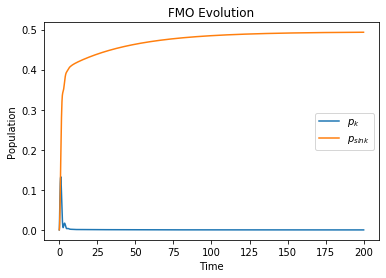

In [102]:
n = 3
m = 10
cavityfreq = 1.0
coupling_const = 1.0
projection_dipole = 1.0
use_rwa = True
relax_rate = 1.0
site_energy = 1.0
tunneling_strength = 1.0
rad_rate = 0.0
deph_rate = 0.0
Gamma_c = 1.0
T = 200
nt = 2500
tlist = np.linspace(0, T, nt)
dt = tlist[1] - tlist[0]

nodiss = cavityFMO(n, m, cavityfreq, coupling_const, projection_dipole, use_rwa, site_energy, tunneling_strength, rad_rate, deph_rate, Gamma_c, relax_rate, T, nt)

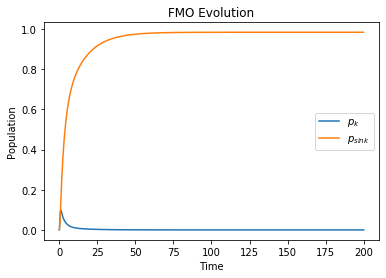

In [103]:
n = 3
m = 10
cavityfreq = 1.0
coupling_const = 1.0
projection_dipole = 1.0
use_rwa = True
relax_rate = 1.0
site_energy = 1.0
tunneling_strength = 1.0
rad_rate = 0.0
deph_rate = 1.0
Gamma_c = 1.0
T = 200
nt = 2500
tlist = np.linspace(0, T, nt)
dt = tlist[1] - tlist[0]

nodiss = cavityFMO(n, m, cavityfreq, coupling_const, projection_dipole, use_rwa, site_energy, tunneling_strength, rad_rate, deph_rate, Gamma_c, relax_rate, T, nt)